# DIGS 20006/30006 : NLP Assignment 3

In [1]:
import nltk
from nltk.corpus import words
from nltk.corpus import wordnet 

In [2]:
import matplotlib.pyplot as plt
%matplotlib inline  

In [3]:
import spacy
nlp = spacy.load('en_core_web_sm')

In [4]:
from spacy.tokenizer import Tokenizer
tokenizer = Tokenizer(nlp.vocab)

## Load the text

I have chosen 'The Count of Monte Cristo' By Alexandre Dumas.

In [5]:
with open("MC.txt") as f:
    content = f.read().splitlines()
    #content = list(filter(None, content))
    content = " ".join(content)
    content = content.lower()

In [6]:
content[:1000]

'chapter 1. marseilles—the arrival  on the 24th of february, 1815, the look-out at notre-dame de la garde signalled the three-master, the pharaon from smyrna, trieste, and naples.  as usual, a pilot put off immediately, and rounding the château d’if, got on board the vessel between cape morgiou and rion island.  immediately, and according to custom, the ramparts of fort saint-jean were covered with spectators; it is always an event at marseilles for a ship to come into port, especially when this ship, like the pharaon, has been built, rigged, and laden at the old phocee docks, and belongs to an owner of the city.  the ship drew on and had safely passed the strait, which some volcanic shock has made between the calasareigne and jaros islands; had doubled pomègue, and approached the harbor under topsails, jib, and spanker, but so slowly and sedately that the idlers, with that instinct which is the forerunner of evil, asked one another what misfortune could have happened on board. however

In [7]:
print("The raw length of my text is %d" % len(content))

The raw length of my text is 2617253


## 1. Use NLTK & SpaCy to tokenize the text

In [38]:
nltk_tokens = nltk.word_tokenize(content)
Nw = %timeit -o nltk.tokenize.word_tokenize(content)
print(nltk_tokens[:100])

2.73 s ± 82.1 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
['chapter', '1.', 'marseilles—the', 'arrival', 'on', 'the', '24th', 'of', 'february', ',', '1815', ',', 'the', 'look-out', 'at', 'notre-dame', 'de', 'la', 'garde', 'signalled', 'the', 'three-master', ',', 'the', 'pharaon', 'from', 'smyrna', ',', 'trieste', ',', 'and', 'naples', '.', 'as', 'usual', ',', 'a', 'pilot', 'put', 'off', 'immediately', ',', 'and', 'rounding', 'the', 'château', 'd', '’', 'if', ',', 'got', 'on', 'board', 'the', 'vessel', 'between', 'cape', 'morgiou', 'and', 'rion', 'island', '.', 'immediately', ',', 'and', 'according', 'to', 'custom', ',', 'the', 'ramparts', 'of', 'fort', 'saint-jean', 'were', 'covered', 'with', 'spectators', ';', 'it', 'is', 'always', 'an', 'event', 'at', 'marseilles', 'for', 'a', 'ship', 'to', 'come', 'into', 'port', ',', 'especially', 'when', 'this', 'ship', ',', 'like']


In [41]:
spacy_tokens = tokenizer(content)
Sw = %timeit -o tokenizer(content)
stokens = []
for token in spacy_tokens:
    stokens.append(token.text)

2.34 s ± 32.8 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [10]:
type(spacy_tokens)

spacy.tokens.doc.Doc

In [36]:
print("The number of NLTK tokens is %d" % len(nltk_tokens))
print("The unique number of NLTK tokens is %d" % len(set(nltk_tokens)))


The number of NLTK tokens is 570102
The unique number of NLTK tokens is 20925


In [37]:
print("The number of SpaCy tokens is %d" % len(stokens))
print("The unique number of SpaCy tokens is %d" % len(set(stokens)))

The number of SpaCy tokens is 474926
The unique number of SpaCy tokens is 38082


In [13]:
def common_token(a, b): 
    a_set = set(a) 
    b_set = set(b) 
    return (a_set & b_set)

In [14]:
common = common_token(nltk_tokens, stokens)

In [15]:
print("The number of common tokens in both is %d" % len(common))
print("The number of unique tokens in NLTK is %d" % (len(set(stokens))-len(common)))
print("The number of unique tokens in SpaCy is %d" % (len(set(nltk_tokens))-len(common)))

The number of common tokens in both is 16731
The number of unique tokens in NLTK is 21351
The number of unique tokens in SpaCy is 4194


## 2. Regular Expression

In [16]:
import re

In [17]:
test = "fed age alling added bing cleaned'"

In [18]:
re.findall(r"\ba[A-Za-z]*ing\b|\ba[A-Za-z]*ed\b]*\b", test)
#re.findall(r'\ba\w*(?:ing|ed)\b', test)

['alling', 'added']

In [19]:
#a. All words beginning with a– and ending in –ing or –ed.
inged = set(re.findall(r"\ba[A-Za-z]*ing\b|\ba[A-Za-z]*ed\b]*\b", content))

In [20]:
print(inged)

{'attaching', 'accused', 'accosting', 'advertised', 'annoyed', 'alleging', 'alluding', 'amusing', 'amused', 'atoning', 'attracting', 'avowed', 'afforded', 'attuned', 'advised', 'alluded', 'abandoning', 'apologizing', 'aching', 'assassinated', 'adapted', 'accustoming', 'attached', 'anticipating', 'attained', 'accursed', 'accepting', 'appropriated', 'appalled', 'approving', 'assumed', 'arrived', 'asking', 'awarded', 'approaching', 'accustomed', 'acquitted', 'approached', 'applying', 'apologized', 'annulled', 'anchoring', 'attributing', 'addressing', 'alienated', 'attracted', 'anticipated', 'appointed', 'awning', 'accompanied', 'ascertained', 'analyzed', 'altered', 'afflicted', 'arming', 'applauding', 'attempting', 'anointed', 'accosted', 'ashamed', 'allying', 'administering', 'awakened', 'alluring', 'absorbing', 'appeared', 'appearing', 'awed', 'anchored', 'associated', 'astounded', 'aiding', 'aimed', 'arriving', 'adjoining', 'avenging', 'assailed', 'amazed', 'adding', 'advanced', 'adjus

In [21]:
#b. All words with –ing– in the middle of the word.
pattern = "ing"
m = set(re.findall(r"\b[A-Za-z]+ing[a-z]+\b", content))

In [22]:
print(m)

{'stings', 'unwillingly', 'nothingness', 'buildings', 'willingly', 'distinguishable', 'springing', 'gnawings', 'accordingly', 'ravellings', 'underlings', 'flinging', 'coverings', 'extinguishers', 'revoltingly', 'dingy', 'hesitatingly', 'openings', 'fringe', 'jingling', 'blessings', 'beings', 'forebodings', 'extinguished', 'linguist', 'fingers', 'unresistingly', 'whitings', 'sufferings', 'scrutinizingly', 'infringed', 'stockings', 'extinguish', 'lingered', 'insultingly', 'proceedings', 'charmingly', 'tinged', 'inquiringly', 'surpassingly', 'distinguished', 'confidingly', 'assentingly', 'clinging', 'despairingly', 'unhesitatingly', 'intermingled', 'doubtingly', 'jottings', 'fringed', 'amusingly', 'infringement', 'laughingly', 'springtide', 'untiringly', 'glimmerings', 'strings', 'smilingly', 'surroundings', 'grudgingly', 'nightingales', 'tinge', 'lingers', 'drawings', 'willingness', 'misgivings', 'feelings', 'beatings', 'bringing', 'rings', 'linguistic', 'singularity', 'hinges', 'turning

In [23]:
#c. After removing all punctuation, provide a count of all words in your text containing
#numbers or punctuation and letters (if any).
clean = re.sub(r'[^\w\s\d]',' ', content) 

In [24]:
print("The raw length of my text without punctuation is %d" % len(clean))

The raw length of my text without punctuation is 2617253


In [25]:
mixed_word = re.findall("\w*[\d@]\w*", content)
#re.findall('[A-Za-z]+[\d@]+[\w@]*|[\d@]+[A-Za-z]+[\w@]*', content)

In [26]:
print(mixed_word[:10])

['1', '24th', '1815', '0023m', '25', '000', '0025m', '0027m', '0029m', '2']


In [27]:
print("The count of all words in my text containing numbers is %d" % len(mixed_word))

The count of all words in my text containing numbers is 1332


## 3. A selection of different “stems” from the 3 NLTK stemmers

In [28]:
# Raw token
print(nltk_tokens[1000:1100])

['will', 'come', 'on', 'board', ',', 'm.', 'morrel', ',', '”', 'said', 'dantès', ',', 'observing', 'the', 'owner', '’', 's', 'impatience', ',', '“', 'here', 'is', 'your', 'supercargo', ',', 'm.', 'danglars', ',', 'coming', 'out', 'of', 'his', 'cabin', ',', 'who', 'will', 'furnish', 'you', 'with', 'every', 'particular', '.', 'as', 'for', 'me', ',', 'i', 'must', 'look', 'after', 'the', 'anchoring', ',', 'and', 'dress', 'the', 'ship', 'in', 'mourning.', '”', 'the', 'owner', 'did', 'not', 'wait', 'for', 'a', 'second', 'invitation', '.', 'he', 'seized', 'a', 'rope', 'which', 'dantès', 'flung', 'to', 'him', ',', 'and', 'with', 'an', 'activity', 'that', 'would', 'have', 'done', 'credit', 'to', 'a', 'sailor', ',', 'climbed', 'up', 'the', 'side', 'of', 'the', 'ship']


In [29]:
# Porter
from nltk.stem import PorterStemmer
ps = PorterStemmer()
print([ps.stem(word) for word in nltk_tokens[1000:1100]])

['will', 'come', 'on', 'board', ',', 'm.', 'morrel', ',', '”', 'said', 'dantè', ',', 'observ', 'the', 'owner', '’', 's', 'impati', ',', '“', 'here', 'is', 'your', 'supercargo', ',', 'm.', 'danglar', ',', 'come', 'out', 'of', 'hi', 'cabin', ',', 'who', 'will', 'furnish', 'you', 'with', 'everi', 'particular', '.', 'as', 'for', 'me', ',', 'i', 'must', 'look', 'after', 'the', 'anchor', ',', 'and', 'dress', 'the', 'ship', 'in', 'mourning.', '”', 'the', 'owner', 'did', 'not', 'wait', 'for', 'a', 'second', 'invit', '.', 'he', 'seiz', 'a', 'rope', 'which', 'dantè', 'flung', 'to', 'him', ',', 'and', 'with', 'an', 'activ', 'that', 'would', 'have', 'done', 'credit', 'to', 'a', 'sailor', ',', 'climb', 'up', 'the', 'side', 'of', 'the', 'ship']


In [30]:
# Lancaster
from nltk.stem import LancasterStemmer
lc = LancasterStemmer()
print([lc.stem(word) for word in nltk_tokens[1000:1100]])

['wil', 'com', 'on', 'board', ',', 'm.', 'morrel', ',', '”', 'said', 'dantè', ',', 'observ', 'the', 'own', '’', 's', 'impaty', ',', '“', 'her', 'is', 'yo', 'supercargo', ',', 'm.', 'dangl', ',', 'com', 'out', 'of', 'his', 'cabin', ',', 'who', 'wil', 'furn', 'you', 'with', 'every', 'particul', '.', 'as', 'for', 'me', ',', 'i', 'must', 'look', 'aft', 'the', 'anch', ',', 'and', 'dress', 'the', 'ship', 'in', 'mourning.', '”', 'the', 'own', 'did', 'not', 'wait', 'for', 'a', 'second', 'invit', '.', 'he', 'seiz', 'a', 'rop', 'which', 'dantè', 'flung', 'to', 'him', ',', 'and', 'with', 'an', 'act', 'that', 'would', 'hav', 'don', 'credit', 'to', 'a', 'sail', ',', 'climb', 'up', 'the', 'sid', 'of', 'the', 'ship']


In [31]:
# Snowball
from nltk.stem.snowball import SnowballStemmer
snowball = SnowballStemmer("english")

In [32]:
print([snowball.stem(word) for word in nltk_tokens[1000:1100]])

['will', 'come', 'on', 'board', ',', 'm.', 'morrel', ',', '”', 'said', 'dantè', ',', 'observ', 'the', 'owner', '’', 's', 'impati', ',', '“', 'here', 'is', 'your', 'supercargo', ',', 'm.', 'danglar', ',', 'come', 'out', 'of', 'his', 'cabin', ',', 'who', 'will', 'furnish', 'you', 'with', 'everi', 'particular', '.', 'as', 'for', 'me', ',', 'i', 'must', 'look', 'after', 'the', 'anchor', ',', 'and', 'dress', 'the', 'ship', 'in', 'mourning.', '”', 'the', 'owner', 'did', 'not', 'wait', 'for', 'a', 'second', 'invit', '.', 'he', 'seiz', 'a', 'rope', 'which', 'dantè', 'flung', 'to', 'him', ',', 'and', 'with', 'an', 'activ', 'that', 'would', 'have', 'done', 'credit', 'to', 'a', 'sailor', ',', 'climb', 'up', 'the', 'side', 'of', 'the', 'ship']


## 4. Lemmas

In [33]:
# NLTK
from nltk.stem import WordNetLemmatizer
wl = WordNetLemmatizer()
nltk_lemmas = [wl.lemmatize(word) for word in nltk_tokens]
print("The unique Lemmas(NLTK) is %d" % len(set(nltk_lemmas)))

The unique Lemmas(NLTK) is 19095


In [34]:
# SpaCy
spacy_lemmas = [token.lemma_ for token in spacy_tokens]
print("The unique Lemmas(SpaCy) is %d" % len(set(spacy_lemmas)))

The unique Lemmas(SpaCy) is 33871


In [35]:
print(nltk_tokens[:100])
print("")
print(nltk_lemmas[:100])
print("")
print(spacy_lemmas[:100])

['chapter', '1.', 'marseilles—the', 'arrival', 'on', 'the', '24th', 'of', 'february', ',', '1815', ',', 'the', 'look-out', 'at', 'notre-dame', 'de', 'la', 'garde', 'signalled', 'the', 'three-master', ',', 'the', 'pharaon', 'from', 'smyrna', ',', 'trieste', ',', 'and', 'naples', '.', 'as', 'usual', ',', 'a', 'pilot', 'put', 'off', 'immediately', ',', 'and', 'rounding', 'the', 'château', 'd', '’', 'if', ',', 'got', 'on', 'board', 'the', 'vessel', 'between', 'cape', 'morgiou', 'and', 'rion', 'island', '.', 'immediately', ',', 'and', 'according', 'to', 'custom', ',', 'the', 'ramparts', 'of', 'fort', 'saint-jean', 'were', 'covered', 'with', 'spectators', ';', 'it', 'is', 'always', 'an', 'event', 'at', 'marseilles', 'for', 'a', 'ship', 'to', 'come', 'into', 'port', ',', 'especially', 'when', 'this', 'ship', ',', 'like']

['chapter', '1.', 'marseilles—the', 'arrival', 'on', 'the', '24th', 'of', 'february', ',', '1815', ',', 'the', 'look-out', 'at', 'notre-dame', 'de', 'la', 'garde', 'signalle

For the same text, using NLTK lemmatizer ended up getting a smaller unique number of lemmas than SpaCy.

## 5. Findings

NLTK provides 9 different stemming libraries, allow users to finely customize their model. But this can be a hindrance. Which algorithm performs the best? Which is the fastest? Which is being maintained?
In contrast, spaCy implements a single stemmer, the one that the spaCy developers feel to be best. I guess sometimes it's easier when I have no other choices.

NLTK is a string processing library. All the tools take strings as input and return strings or lists of strings as output. 
On the other hand, spaCy uses an object-oriented approach. Parsing some text returns an object. Each of these objects has a number of useful attributes and methods. This object-oriented approach lends itself to be more Pythonic than does the string-handling system of NLTK. We can expect spaCy may outperform NLTK in speed when dealing with larger text data.


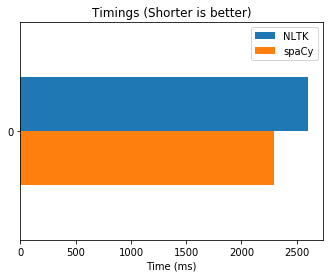

In [50]:
import pandas as pd
import numpy as np
pd.DataFrame(np.array([t.best * 1000 for t in (Nw, Sw)]).reshape((1, 2)),columns=["NLTK", "spaCy"]).plot.barh()
plt.subplots_adjust(left=0.2)
plt.title('Timings (Shorter is better)')
plt.xlabel('Time (ms)')
plt.gca().invert_yaxis()
plt.rcParams['savefig.dpi'] = 150
plt.savefig('timing.png')